<a href="https://colab.research.google.com/github/barywhyte/analytics/blob/master/CustomerDataML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Challenge Overview
>This data is a collection of a large volume of data about customers, including demographic features and details of purchases they have made. My interest is in analyzing this data to determine any apparent relationships between demographic features known about the customers and the likelihood of a customer purchasing a bike. Additionally, the analysis should endeavor to determine whether a customer's average monthly spend with the company can be predicted from known customer characteristics.

#### In this project, I tackled three challenges:

>Challenge 1: Explore the data and gain some insights into customer characteristics and purchasing behavior.
Challenge 2: Build a classification model to predict customer purchasing behavior.
Challenge 3: Build a regression model to predict customer purchasing behavior.

### Import necessary packages

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [9]:
from google.colab import files
orig = files.upload()


In [0]:
orig = pd.read_csv('AdvWorksCusts.csv')

In [11]:
## fix column names so the '-' character becomes '_'
cols = orig.columns
orig.columns = [str.replace('-', '_') for str in cols]
orig.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome'],
      dtype='object')

### Check for and deal with missing values

In [12]:
missing_values = orig.isnull().sum()
print(missing_values[missing_values > 0])

Title           16431
MiddleName       6985
Suffix          16517
AddressLine2    16243
dtype: int64


>Because these missing values (all non-numeric) are so many and they barely have any impact on my tranning, I decided to drop them.
>In another scenario, I could have used Imputer package to replace missing values with their respective means

In [13]:
cols_with_missing_values = [col for col in orig.columns if orig[col].isnull().any()]
reduced_orig = orig.drop(cols_with_missing_values, axis = 1)
print(reduced_orig.shape)
reduced_orig.head()

(16519, 19)


,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


### Exploring the reduced_orig dataset

In [14]:
reduced_orig.dtypes

CustomerID               int64
FirstName               object
LastName                object
AddressLine1            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
dtype: object

In [15]:
reduced_orig.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
count,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000
mean,20234.225195,0.673891,1.500999,0.992009,2.006235,78122.511532
std,5342.515987,0.468802,1.138962,1.515048,1.682736,39710.985718
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000
25%,15604.500000,0.000000,1.000000,0.000000,0.000000,47807.500000
50%,20221.000000,1.000000,2.000000,0.000000,2.000000,76120.000000
75%,24860.500000,1.000000,2.000000,2.000000,3.000000,105194.500000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000


### Lets explore the categorical features

In [16]:
cat_cols = [ col for col in reduced_orig.select_dtypes('object')]
def count_unique(reduced_orig, cols):
    for col in cols:
        print('\n', 'For column ' , col)
        print(reduced_orig[col].value_counts())

count_unique(reduced_orig, cat_cols)


 For column  FirstName
Jennifer     87
Isabella     87
Lucas        86
Richard      86
Eduardo      86
Katherine    85
Marcus       85
Dalton       85
Morgan       84
Alexandra    83
Sydney       81
Kaitlyn      80
Natalie      79
Chloe        79
Julia        78
Xavier       77
Seth         76
Ian          76
James        74
Devin        73
Thomas       72
Jose         69
Jessica      68
Miguel       68
Jonathan     67
Abigail      67
Blake        66
Rachel       66
Jordan       66
Samuel       66
             ..
Sylvia        1
Abhijit       1
Petr          1
Ioannis       1
Anders        1
Irma          1
Masaki        1
Daisuke       1
Y.            1
Gerrit        1
Mike          1
Gretchen      1
Wilson        1
Rodrigo       1
Kern          1
Marty         1
Masato        1
Begoña        1
Ram           1
Stuart        1
Alícia        1
Giraldo       1
Peggy         1
Giorgio       1
Alice         1
Birgit        1
Alma          1
Muniraju      1
Sriniwa       1
Ramón         1


### Exploring numeric variables

In [17]:
num_cols = [col for col in reduced_orig.select_dtypes('int64')]
del num_cols[0]
num_cols

['HomeOwnerFlag',
 'NumberCarsOwned',
 'NumberChildrenAtHome',
 'TotalChildren',
 'YearlyIncome']

In [18]:
count_unique(reduced_orig, num_cols)


 For column  HomeOwnerFlag
1    11132
0     5387
Name: HomeOwnerFlag, dtype: int64

 For column  NumberCarsOwned
2    5786
1    4358
0    3799
3    1439
4    1137
Name: NumberCarsOwned, dtype: int64

 For column  NumberChildrenAtHome
0    9990
1    2197
2    1462
3    1066
4     952
5     852
Name: NumberChildrenAtHome, dtype: int64

 For column  TotalChildren
0    4267
2    3184
1    3079
4    2271
3    1990
5    1728
Name: TotalChildren, dtype: int64

 For column  YearlyIncome
46333     4
65193     4
97398     4
90448     3
45158     3
65243     3
88674     3
104988    3
92963     3
125879    3
91408     3
45440     3
165819    3
101542    3
88923     3
45434     3
129460    3
82926     3
72663     3
21102     3
11803     3
76220     3
80953     3
46325     3
94610     3
101874    3
53483     3
106128    3
18800     3
46362     3
         ..
109471    1
17314     1
168936    1
33706     1
62436     1
19427     1
83379     1
17068     1
54240     1
24752     1
111580    1
27607     1

### Visualizing reduced_orig data numeric features with bar charts

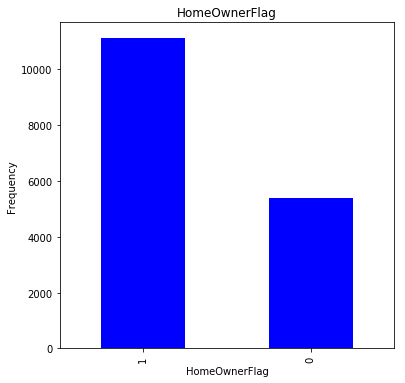

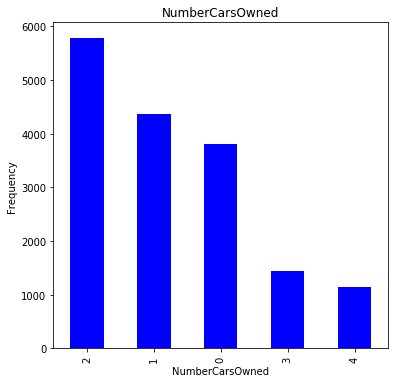

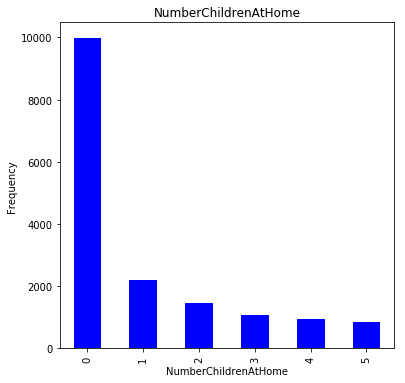

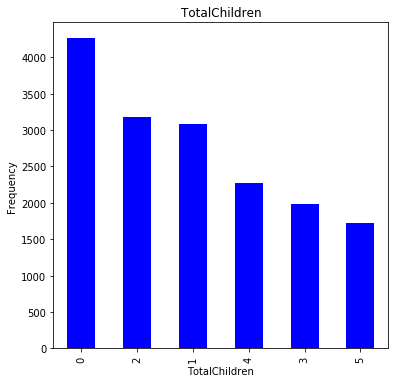

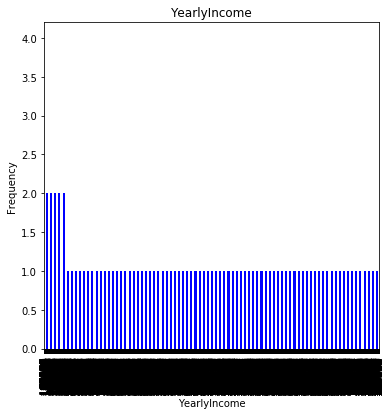

In [19]:
def plot_graph(reduced_orig, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = reduced_orig[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title(col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Frequency')# Set text for y axis
        plt.show()

plot_cols = num_cols
plot_graph(reduced_orig, plot_cols)    

### Finding correlation between features of the dataset

In [25]:
num_cols_data = reduced_orig[num_cols]
print('\n Correlation bewteen HomeOwnerFlag and NumberCarsOwned:', reduced_orig['HomeOwnerFlag'].corr(reduced_orig['NumberCarsOwned']))
print('\n Correlation bewteen HomeOwnerFlag and NumberChildrenAtHome:', reduced_orig['HomeOwnerFlag'].corr(reduced_orig['NumberChildrenAtHome']))
print('\n Correlation bewteen HomeOwnerFlag and TotalChildren:', reduced_orig['HomeOwnerFlag'].corr(reduced_orig['TotalChildren']))
print('\n Correlation bewteen HomeOwnerFlag and YearlyIncome:', reduced_orig['HomeOwnerFlag'].corr(reduced_orig['YearlyIncome']))
print('\n Correlation bewteen TotalChildren and YearlyIncome:', reduced_orig['TotalChildren'].corr(reduced_orig['YearlyIncome']))




 Correlation bewteen HomeOwnerFlag and NumberCarsOwned: -0.05398329176901437

 Correlation bewteen HomeOwnerFlag and NumberChildrenAtHome: 0.13424382822631348

 Correlation bewteen HomeOwnerFlag and TotalChildren: 0.18653001845230785

 Correlation bewteen HomeOwnerFlag and YearlyIncome: 0.07530421710614285

 Correlation bewteen TotalChildren and YearlyIncome: 0.3626521990646709


### Prepare data for scikit-learn model

>Note that I am not splitting the data into train and test datasets.
This is because I have an external test data for this model

In [26]:
print(reduced_orig.shape)
reduced_orig

(16519, 19)


,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771
5,11005,Julio,Ruiz,7305 Humphrey Drive,East Brisbane,Queensland,Australia,4169,1 (11) 500 555-0151,1965-08-05,Bachelors,Professional,M,S,1,1,0,0,103199
6,11006,Janet,Alvarez,2612 Berry Dr,Matraville,New South Wales,Australia,2036,1 (11) 500 555-0184,1965-12-06,Bachelors,Professional,F,S,1,1,0,0,84756
7,11007,Marco,Mehta,942 Brook Street,Warrnambool,Victoria,Australia,3280,1 (11) 500 555-0126,1964-05-09,Bachelors,Professional,M,M,1,2,3,3,109759
8,11008,Rob,Verhoff,624 Peabody Road,Bendigo,Victoria,Australia,3550,1 (11) 500 555-0164,1964-07-07,Bachelors,Professional,F,S,1,3,4,4,88005
9,11009,Shannon,Carlson,3839 Northgate Road,Hervey Bay,Queensland,Australia,4655,1 (11) 500 555-0110,1964-04-01,Bachelors,Professional,M,S,0,1,0,0,106399


In [29]:
#This is my label data
#label = files.upload()
label = pd.read_csv('AW_BikeBuyer.csv')
label.shape

(16519, 2)

In [30]:
#This is my test data
#test1_data = files.upload()
test1_data = pd.read_csv('AW_test.csv')
test_data = test1_data.drop(cols_with_missing_values, axis = 1)
print(test_data.shape)
test_data.head()

(500, 19)


,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,Courtney,Baker,8727 Buena Vista Ave.,Fremont,California,United States,94536,133-555-0128,01/05/1945,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,Adam,Allen,3491 Cook Street,Haney,British Columbia,Canada,V2W 1W2,252-555-0173,10/04/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,Bonnie,Raji,359 Pleasant Hill Rd,Burbank,California,United States,91502,409-555-0193,01/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,Julio,Alonso,8945 Euclid Ave.,Burlingame,California,United States,94010,175-555-0196,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,Christy,Andersen,"42, boulevard Tremblay",Dunkerque,Nord,France,59140,1 (11) 500 555-0122,3/19/1965,High School,Manual,F,M,1,1,2,2,21876


##### Now I have my original cleaned data, label as well as test data

##### Next step is to hot encode this data for sckit learn models

In [0]:
prediction_target = label['BikeBuyer']
y = prediction_target
predicting_features = ['CountryRegionName','Education','Occupation','Gender','MaritalStatus','NumberCarsOwned',
                       'TotalChildren','YearlyIncome']
X = reduced_orig[predicting_features]

In [0]:
encoded_X = pd.get_dummies(X)
encoded_test_data = pd.get_dummies(test_data)

In [33]:
# aline both training and test data. The align command makes sure the columns 
#show up in the same order in both datasets (it uses column names to 
#identify which columns line up in each dataset.)

final_train, final_test = encoded_X.align(encoded_test_data, join='left', axis = 1)
print(final_test.shape)
print(final_train.shape)

(500, 23)
(16519, 23)


In [34]:
my_model = XGBRegressor()
my_model.fit(final_train, y, verbose = True)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [35]:
predictions =my_model.predict(final_test)
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y[0:500])))
print("Root Mean Absolute Error : " + str(sqrt(mean_absolute_error(predictions, y[0:500]))))

Mean Absolute Error : 0.446897980093956
Root Mean Absolute Error : 0.6685042857708213
